In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
basedir = '/content/drive/MyDrive/Dissertation/Datasets'

In [4]:
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'Caesar et al. (2018).csv'))

In [5]:
df = load_csv('/content/drive/MyDrive/Dissertation/Datasets')

In [6]:
df

year  AMOC proxy [K]  lower bound 95%  upper bound 95%
0    1871       -8.439521        -8.699521        -8.179521
1    1872       -8.693379        -8.953379        -8.433379
2    1873       -8.408936        -8.668936        -8.148936
3    1874       -8.359843        -8.619843        -8.099843
4    1875       -8.407114        -8.667114        -8.147114
..    ...             ...              ...              ...
141  2012       -8.863189        -9.123189        -8.603189
142  2013       -8.759240        -9.019240        -8.499240
143  2014       -9.291162        -9.551162        -9.031162
144  2015       -9.457081        -9.717081        -9.197081
145  2016       -9.618664        -9.878664        -9.358664

[146 rows x 4 columns]

In [7]:
df.shape

(146, 4)

In [8]:
df.head()

year  AMOC proxy [K]  lower bound 95%  upper bound 95%
0  1871       -8.439521        -8.699521        -8.179521
1  1872       -8.693379        -8.953379        -8.433379
2  1873       -8.408936        -8.668936        -8.148936
3  1874       -8.359843        -8.619843        -8.099843
4  1875       -8.407114        -8.667114        -8.147114

In [9]:
df.tail()

year  AMOC proxy [K]  lower bound 95%  upper bound 95%
141  2012       -8.863189        -9.123189        -8.603189
142  2013       -8.759240        -9.019240        -8.499240
143  2014       -9.291162        -9.551162        -9.031162
144  2015       -9.457081        -9.717081        -9.197081
145  2016       -9.618664        -9.878664        -9.358664

In [11]:
pip install plotnine

In [12]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

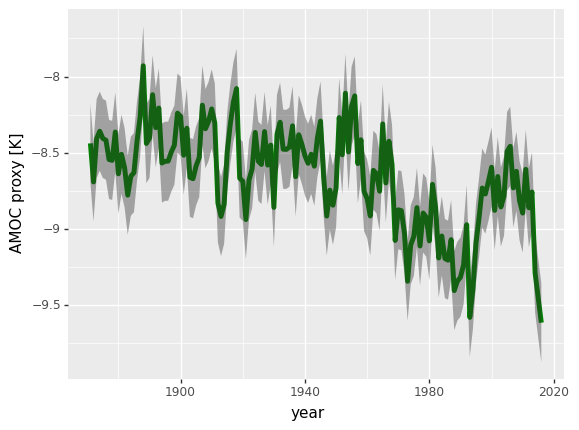

<ggplot: (8729978082489)>

In [13]:
(
    ggplot(df)  
    + aes(x="year", y="AMOC proxy [K]")  
    + geom_line(colour = 'green', size = 2) 
    + geom_ribbon(aes(ymax = "lower bound 95%",ymin = "upper bound 95%"),alpha = 0.4)
)

In [14]:
new = df.dropna()

In [15]:
o = len(df.axes[0])
n = len(new.axes[0])
print(f"Deleted Rows= {o-n}")

Deleted Rows= 0


In [16]:
column = []
for col in new.columns:
    column.append(col)

In [17]:
for i in column:
  mean = np.mean(df[i])
  print(f"Mean of {i} = {mean}")

Mean of year = 1943.5
Mean of AMOC proxy [K] = -8.659325993150688
Mean of lower bound 95% = -8.919325993150688
Mean of upper bound 95% = -8.399325993150688


In [18]:
for i in column:
  median = np.median(df[i])
  print(f"Median of {i} = {median}")

Median of year = 1943.5
Median of AMOC proxy [K] = -8.608442
Median of lower bound 95% = -8.868442
Median of upper bound 95% = -8.348442


In [19]:
from scipy import stats
for i in column:
  mode = stats.mode(df[i])
  print(f"Mode of {i} = {mode[0][0]}")

Mode of year = 1871
Mode of AMOC proxy [K] = -8.732505999999999
Mode of lower bound 95% = -8.992506
Mode of upper bound 95% = -8.472506


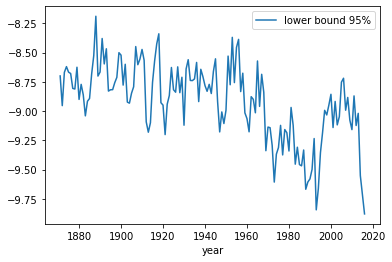

In [20]:
d = 0
for i in column:
  if i != 'year':
    fig = df.plot(x="year", y=[i])
    d = d + 1

In [21]:
!sudo apt-get install jags
!pip install pyjags

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  jags
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,562 kB of archives.
After this operation, 3,522 kB of additional disk space will be used.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ jags 4.3.0-3bionic0 [1,562 kB]
Fetched 1,562 kB in 0s (7,709 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package jags.
(Reading database ... 155222 files and directories curr

In [22]:
import pyjags

In [23]:
pyjags

<module 'pyjags' from '/usr/local/lib/python3.7/dist-packages/pyjags/__init__.py'>

In [24]:
plt.style.use('ggplot')

In [25]:
N = len('year')
alpha = len('AMOC proxy [K]')
beta = len('lower bound 95%')
sigma = len('upper bound 95%')

In [26]:
# Generate x uniformly
x = np.random.uniform(0, 100, size=N)
# Generate y as alpha + beta * x + Gaussian error term
y = np.random.normal(alpha + x*beta, sigma, size=N)

In [27]:
# JAGS model code
code = '''
model {
    for (i in 1:N) {
        y[i] ~ dnorm(alpha + beta * x[i], tau)
    }
    alpha ~ dnorm(0.0, 1.0E-4)
    beta ~ dnorm(0.0, 1.0E-4)
    sigma <- 1.0/sqrt(tau)
    tau ~ dgamma(1.0E-3, 1.0E-3)
}
'''

In [28]:
# Load additional JAGS module
pyjags.load_module('glm')

In [29]:
# Initialize model with 4 chains and run 1000 adaptation steps in each chain.
# We treat alpha, beta and sigma as parameters we would like to infer, based
# on observed values of x and y.
model = pyjags.Model(code, data=dict(x=x, y=y, N=N), chains=4, adapt=1000)
 
# 500 warmup / burn-in iterations, not used for inference.
model.sample(500, vars=[])
 
# Run model for 1000 steps, monitoring alpha, beta and sigma variables.
# Returns a dictionary with numpy array for each monitored variable.
# Shapes of returned arrays are (... shape of variable ..., iterations, chains).
# In our example it would be simply (1, 1000, 4).
samples = model.sample(1000, vars=['alpha', 'beta', 'sigma'])

sampling: iterations 2000 of 2000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00


In [30]:
# Use pandas three dimensional Panel to represent the trace:
#x = pd.DataFrame({k: v.squeeze(0) for k, v in samples.items()})
trace = pd.Panel({k: v.squeeze(0) for k, v in samples.items()})
#trace.axes[0].name = 'Variable'
##trace.axes[1].name = 'Iteration'
#trace.axes[2].name = 'Chain'
return trace

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

In [31]:
x = {k: v.squeeze(0) for k, v in samples.items()}

In [32]:
x

{'alpha': array([[20.66785599, -7.2621891 , 11.36010329,  8.21566838],
        [13.32661911, -3.88531707, 17.23984716, -1.28406295],
        [17.02065894, 15.66651606,  6.58062923, -5.65773932],
        ...,
        [ 9.61320144, 14.66691358, 13.04017752, 20.11115155],
        [17.14356074, 44.13578317,  9.67017006, 43.51666712],
        [14.05799683,  9.54030435, 13.76564016, 40.59270354]]),
 'beta': array([[14.82206148, 15.06638508, 14.9683069 , 15.00800021],
        [14.85644233, 15.08753061, 15.0403061 , 15.63918902],
        [14.89721544, 15.02429705, 14.57052791, 15.31248336],
        ...,
        [14.93744963, 14.63997249, 15.11904014, 14.53402834],
        [15.1008631 , 14.91172397, 15.14442417, 14.49594977],
        [15.28768766, 15.13324911, 15.31744838, 14.54524627]]),
 'sigma': array([[20.92081453, 16.3002936 , 10.99773912, 22.94282833],
        [15.16218925, 30.98862853, 37.05517208, 14.09801749],
        [ 8.37579804,  7.91525778, 56.28901497,  9.93828972],
        ...,
 

In [ ]:
# Point estimates:
print(trace.to_frame().mean())
 
# Possible output:
# Variable
# alpha 71.693096
# beta 19.860774
# sigma 49.790683

In [ ]:
# Bayesian equal-tailed 95% credible intervals:
print(trace.to_frame().quantile([0.05, 0.95]))
 
# Possible output:
# Variable alpha beta sigma
# 0.05 61.98259 19.694937 46.472748
# 0.95 81.27412 20.025410 53.284573

In [ ]:
def plot(trace, var):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    fig.suptitle(var, fontsize='xx-large')
 
    # Marginal posterior density estimate:
    trace[var].plot.density(ax=axes[0])
    axes[0].set_xlabel('Parameter value')
    axes[0].locator_params(tight=True)
     # Autocorrelation for each chain:
    axes[1].set_xlim(0, 100)
    for chain in trace[var].columns:
        autocorrelation_plot(trace[var,:,chain], axes[1], label=chain)
 
    # Trace plot:
    axes[2].set_ylabel('Parameter value')
    trace[var].plot(ax=axes[2])
 
    # Save figure
    plt.tight_layout()
    fig.savefig('{}.png'.format(var))
 
# Display diagnostic plots
for var in trace:
    plot(trace, var)
 
# Scatter matrix plot:
scatter_matrix(trace.to_frame(), diagonal='density')
plt.savefig('scatter_matrix.png')